In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


In [2]:
results = pd.read_csv("resultado.csv")

In [3]:
action_colors = {
    'execute_and_score_code': '#D94F04',
    'create_report': '#025259',
    'review_code': '#02734A',
    'static_analysis': '#F29325'
}

def plot_rewards_by_episode(data, episodes, action_colors = action_colors, grid_size=(1, 1)):
    # Criar um grid de gráficos
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 10 * grid_size[0]))
    axes = axes.flatten() if grid_size[0] * grid_size[1] > 1 else [axes]

    # Criar a legenda manualmente
    legend_elements = [Patch(facecolor=color, label=label) for label, color in action_colors.items()]

    for idx, episode in enumerate(episodes):
        ax = axes[idx]
        episode_data = data[data['Episódio'] == episode]
        colors = episode_data['Descrição da ação'].map(action_colors)

        ax.bar(episode_data['Iteração'], episode_data['Recompensa'], color=colors)
        ax.set_title(f'Reward ao longo do episódio {episode}', fontsize=16)
        ax.set_xlabel('Iteração', fontsize=14)
        ax.set_ylabel('Recompensa', fontsize=14)
        ax.set_xticks(episode_data['Iteração'])
        ax.tick_params(axis='x')

    # Adicionar a legenda ao último subplot
    fig.legend(handles=legend_elements, title='Descrição da Ação', fontsize=12, title_fontsize=14, loc='upper right')

    plt.tight_layout()
    plt.show()

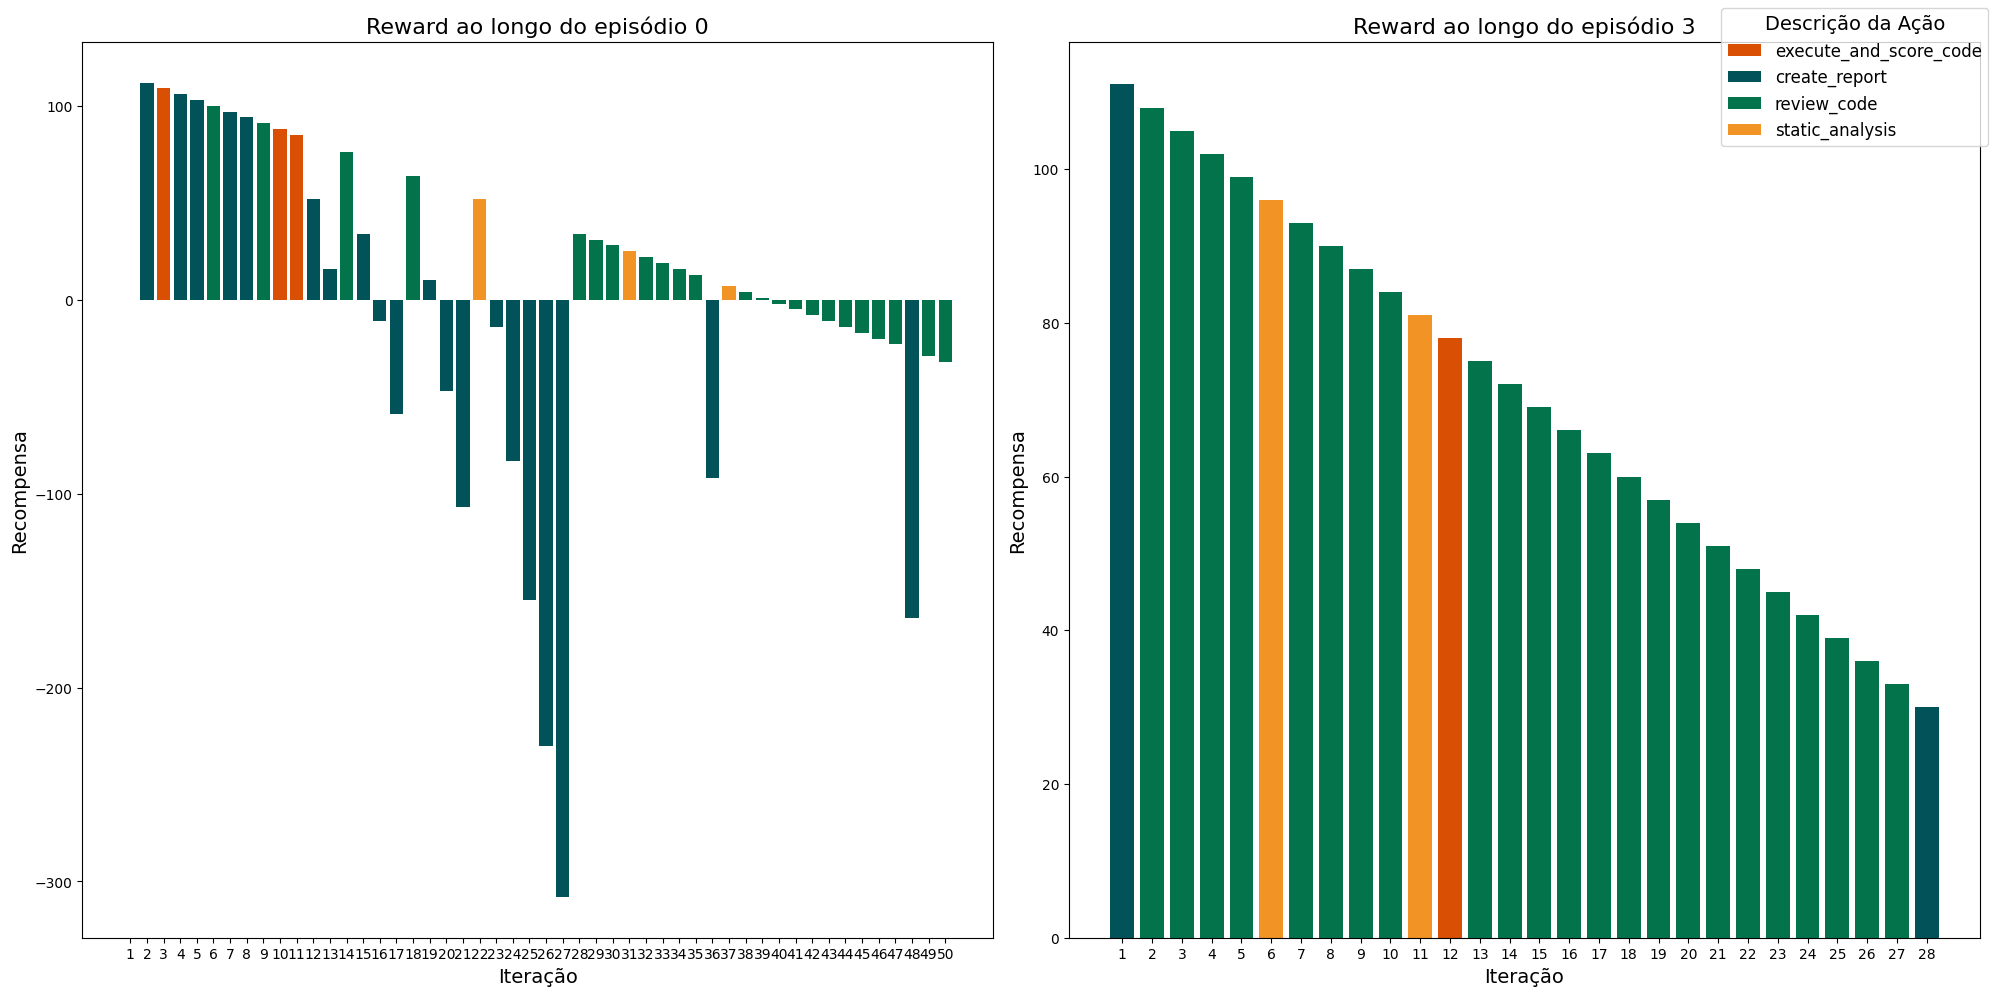

In [4]:
plot_rewards_by_episode(results, [0,3], grid_size=(1,2))


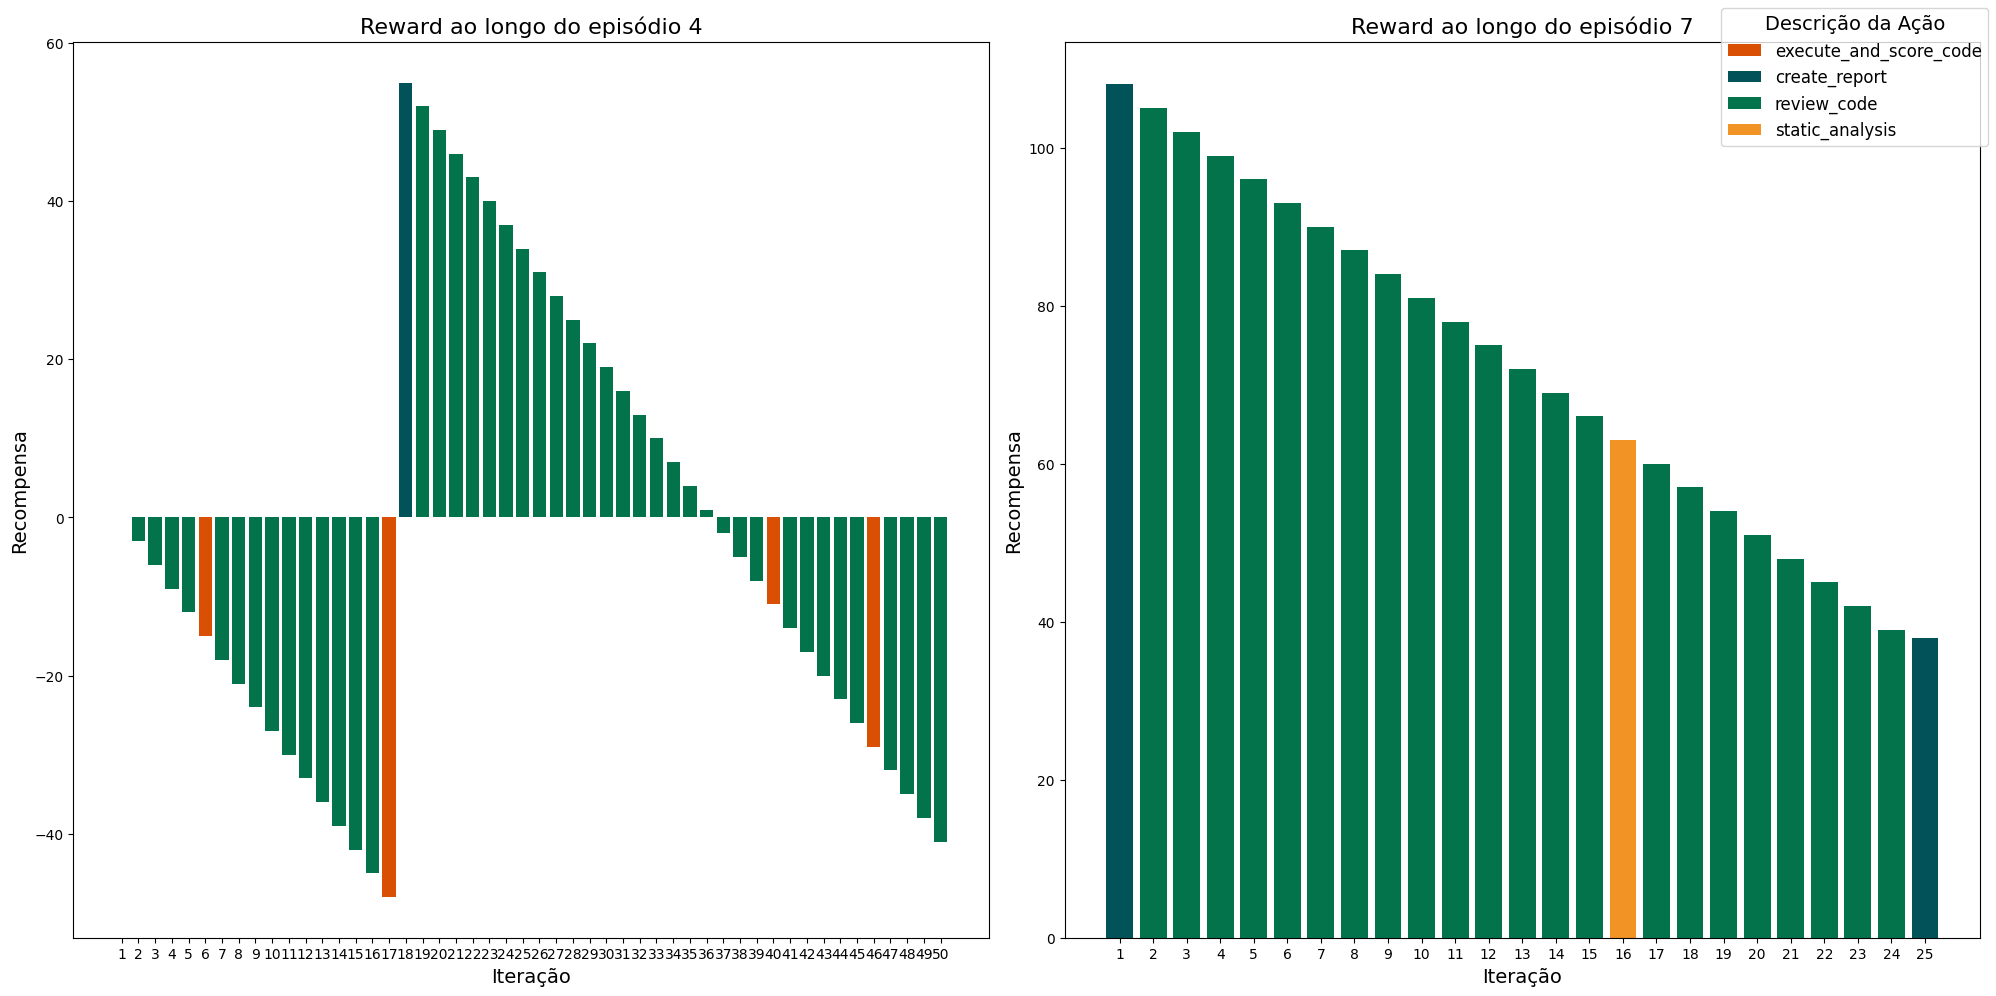

In [5]:
plot_rewards_by_episode(results, [4,7], grid_size=(1,2))


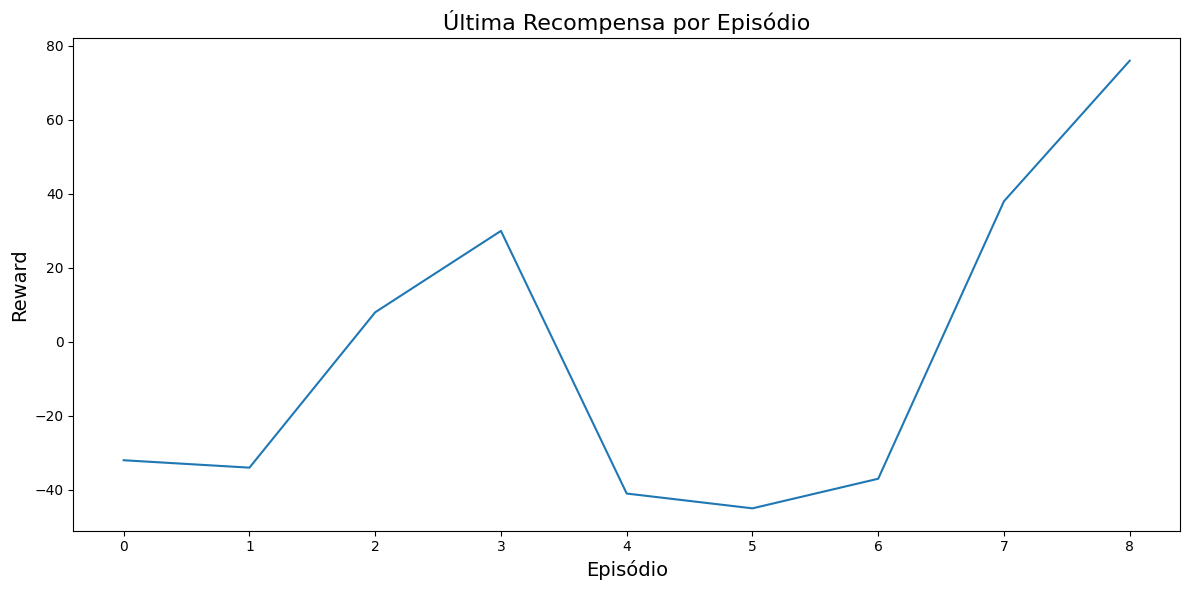

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_last_rewards(data):
    # Obtemos o último reward
    last_rewards = data.sort_values(by=['Episódio', 'Iteração']).groupby('Episódio').tail(1)

    # Configuramos o gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(last_rewards['Episódio'], last_rewards['Recompensa'])

    # Configurações do gráfico
    plt.title('Última Recompensa por Episódio', fontsize=16)
    plt.xlabel('Episódio', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.xticks(last_rewards['Episódio'])
    plt.tight_layout()

    plt.show()

results = pd.read_csv("resultado.csv")
plot_last_rewards(results)
